In [45]:
import zipfile
import os

# Define the path to the uploaded file and extraction location
uploaded_file_path = r"C:/Users/mique/Downloads/renewable energy analysis.zip"
extraction_path = r"C:/Users/mique/Downloads/renewable energy analysis"
# Create the directory for extraction if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files to verify successful extraction
extracted_files = os.listdir(extraction_path)
extracted_files

['01 renewable-share-energy.csv',
 '02 modern-renewable-energy-consumption.csv',
 '03 modern-renewable-prod.csv',
 '04 share-electricity-renewables.csv',
 '05 hydropower-consumption (1).csv',
 '05 hydropower-consumption.csv',
 '06 hydro-share-energy.csv',
 '07 share-electricity-hydro.csv',
 '08 wind-generation.csv',
 '09 cumulative-installed-wind-energy-capacity-gigawatts.csv',
 '10 wind-share-energy.csv',
 '11 share-electricity-wind.csv',
 '12 solar-energy-consumption.csv',
 '13 installed-solar-PV-capacity.csv',
 '14 solar-share-energy.csv',
 '15 share-electricity-solar.csv',
 '16 biofuel-production.csv',
 '17 installed-geothermal-capacity.csv']

In [46]:
import pandas as pd

# Define paths for solar and wind energy-related files
solar_files = [
    "12 solar-energy-consumption.csv",
    "13 installed-solar-PV-capacity.csv",
    "14 solar-share-energy.csv",
    "15 share-electricity-solar.csv"
]

wind_files = [
    "08 wind-generation.csv",
    "09 cumulative-installed-wind-energy-capacity-gigawatts.csv",
    "10 wind-share-energy.csv",
    "11 share-electricity-wind.csv"
]

# Load the solar and wind data into DataFrames
solar_data = {file: pd.read_csv(os.path.join(extraction_path, file)) for file in solar_files}
wind_data = {file: pd.read_csv(os.path.join(extraction_path, file)) for file in wind_files}

# Display a summary of one solar and one wind dataset to understand the structure
solar_sample = solar_data["12 solar-energy-consumption.csv"].head()
wind_sample = wind_data["08 wind-generation.csv"].head()

solar_sample, wind_sample

(        Entity Code  Year  Electricity from solar (TWh)
 0  Afghanistan  AFG  2000                           0.0
 1  Afghanistan  AFG  2001                           0.0
 2  Afghanistan  AFG  2002                           0.0
 3  Afghanistan  AFG  2003                           0.0
 4  Afghanistan  AFG  2004                           0.0,
         Entity Code  Year  Electricity from wind (TWh)
 0  Afghanistan  AFG  2000                          0.0
 1  Afghanistan  AFG  2001                          0.0
 2  Afghanistan  AFG  2002                          0.0
 3  Afghanistan  AFG  2003                          0.0
 4  Afghanistan  AFG  2004                          0.0)

The datasets for solar and wind energy contain data on electricity generation measured in terawatt-hours (TWh) across various countries and years. Here's a brief overview of their structure:

### 1. Solar Energy Dataset (12 solar-energy-consumption.csv):

Columns: Entity, Code, Year, Electricity from solar (TWh)


### 2. Wind Energy Dataset (08 wind-generation.csv):

Columns: Entity, Code, Year, Electricity from wind (TWh)

We will focus on extracting and visualizing trends for:
- Global Solar and Wind Energy Trends: Total production and growth over time.
- Brazil-Specific Insights: Trends specific to solar panels and wind farms.

Let's begin with global trends and then zoom in on Brazil. ​

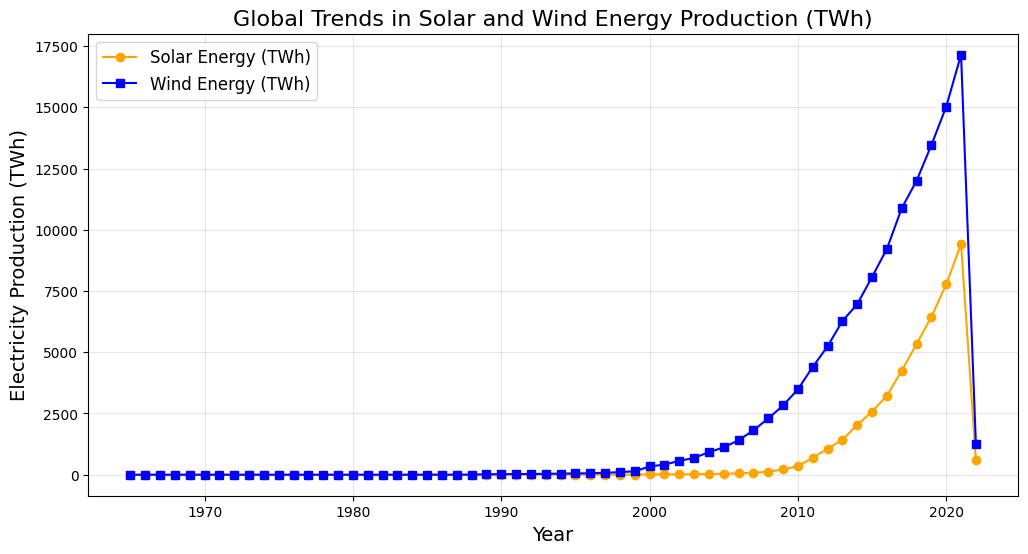

In [47]:
import matplotlib.pyplot as plt

# Combine all years globally for solar and wind to analyze trends
global_solar_trend = solar_data["12 solar-energy-consumption.csv"].groupby("Year")["Electricity from solar (TWh)"].sum()
global_wind_trend = wind_data["08 wind-generation.csv"].groupby("Year")["Electricity from wind (TWh)"].sum()

# Plotting the global trends for solar and wind energy
plt.figure(figsize=(12, 6))
plt.plot(global_solar_trend, label="Solar Energy (TWh)", color="orange", marker="o")
plt.plot(global_wind_trend, label="Wind Energy (TWh)", color="blue", marker="s")
plt.title("Global Trends in Solar and Wind Energy Production (TWh)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (TWh)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The graph above illustrates the global trends in solar and wind energy production over time.

Solar Energy: Rapid growth, especially after 2010, indicating significant investments in solar technology and infrastructure.
The upward trend reflects falling costs of solar panels and increasing global adoption.

Wind Energy: Also experienced consistent growth, with a more established base by 2000 compared to solar. The increase is steady but more linear compared to the exponential rise seen in solar.

Next, we will extract and analyze Brazil-specific data for solar panels and wind farms. ​

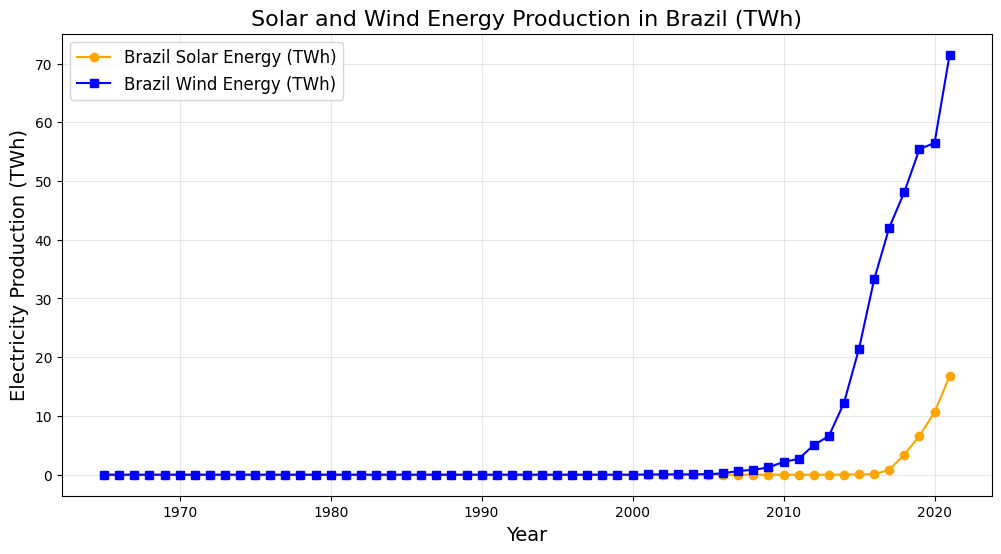

In [48]:
# Filter data for Brazil for both solar and wind energy
brazil_solar = solar_data["12 solar-energy-consumption.csv"]
brazil_wind = wind_data["08 wind-generation.csv"]

brazil_solar = brazil_solar[brazil_solar["Entity"] == "Brazil"]
brazil_wind = brazil_wind[brazil_wind["Entity"] == "Brazil"]

# Plot trends for Brazil
plt.figure(figsize=(12, 6))
plt.plot(
    brazil_solar["Year"], brazil_solar["Electricity from solar (TWh)"],
    label="Brazil Solar Energy (TWh)", color="orange", marker="o"
)
plt.plot(
    brazil_wind["Year"], brazil_wind["Electricity from wind (TWh)"],
    label="Brazil Wind Energy (TWh)", color="blue", marker="s"
)
plt.title("Solar and Wind Energy Production in Brazil (TWh)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (TWh)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

As we can see, the investments and adoptions of solar and wind started 10 years later in Brazil compared to the global trends. But the increase that draws both graphs and both energy sources is similar.

### 2. Calculate Yearly Growth Rates
If we want to compute the annual growth rate for solar and wind energy in Brazil:

In [49]:
# Calculate Yearly Growth Rate
brazil_solar["Growth Rate (%)"] = brazil_solar["Electricity from solar (TWh)"].pct_change() * 100
brazil_wind["Growth Rate (%)"] = brazil_wind["Electricity from wind (TWh)"].pct_change() * 100


C:\Users\mique\AppData\Local\Temp\ipykernel_11736\2340440811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_solar["Growth Rate (%)"] = brazil_solar["Electricity from solar (TWh)"].pct_change() * 100
C:\Users\mique\AppData\Local\Temp\ipykernel_11736\2340440811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_wind["Growth Rate (%)"] = brazil_wind["Electricity from wind (TWh)"].pct_change() * 100


In [50]:
brazil_solar[["Year", "Electricity from solar (TWh)", "Growth Rate (%)"]].tail()


,Year,Electricity from solar (TWh),Growth Rate (%)
1097,2017,0.83,937.500000
1098,2018,3.44,314.457831
1099,2019,6.59,91.569767
1100,2020,10.64,61.456753
1101,2021,16.75,57.424812


In [51]:
brazil_wind[["Year", "Electricity from wind (TWh)", "Growth Rate (%)"]].tail(10)

,Year,Electricity from wind (TWh),Growth Rate (%)
1104,2012,5.05,87.037037
1105,2013,6.58,30.297030
1106,2014,12.21,85.562310
1107,2015,21.47,75.839476
1108,2016,33.24,54.820680
1109,2017,42.06,26.534296
1110,2018,48.12,14.407989
1111,2019,55.43,15.191189
1112,2020,56.48,1.894281
1113,2021,71.50,26.593484


As we can see, the growth rates are higher in solar during the last 5 years but wind energy was adopted earlier. 

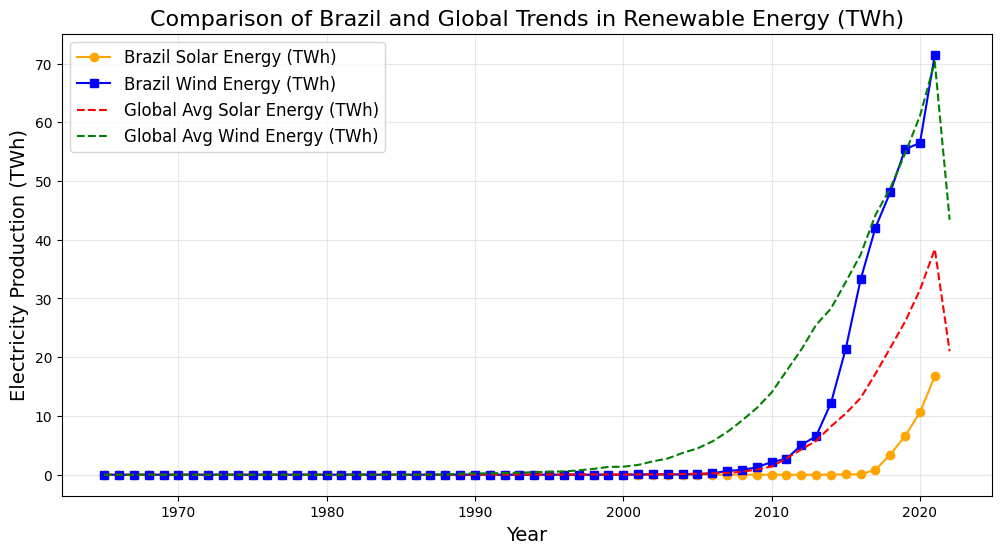

In [52]:
# Calculate Global Averages
global_solar_avg = solar_data["12 solar-energy-consumption.csv"].groupby("Year")["Electricity from solar (TWh)"].mean()
global_wind_avg = wind_data["08 wind-generation.csv"].groupby("Year")["Electricity from wind (TWh)"].mean()

# Plot Brazil vs. Global Averages
plt.figure(figsize=(12, 6))
plt.plot(
    brazil_solar["Year"], brazil_solar["Electricity from solar (TWh)"],
    label="Brazil Solar Energy (TWh)", color="orange", marker="o"
)
plt.plot(
    brazil_wind["Year"], brazil_wind["Electricity from wind (TWh)"],
    label="Brazil Wind Energy (TWh)", color="blue", marker="s"
)
plt.plot(
    global_solar_avg.index, global_solar_avg, label="Global Avg Solar Energy (TWh)", color="red", linestyle="--"
)
plt.plot(
    global_wind_avg.index, global_wind_avg, label="Global Avg Wind Energy (TWh)", color="green", linestyle="--"
)
plt.title("Comparison of Brazil and Global Trends in Renewable Energy (TWh)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (TWh)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [53]:
# Identify Top Years
top_solar_years = brazil_solar.sort_values(by="Electricity from solar (TWh)", ascending=False).head(5)
top_wind_years = brazil_wind.sort_values(by="Electricity from wind (TWh)", ascending=False).head(5)

print("Top 5 Years for Solar Energy in Brazil:")
print(top_solar_years[["Year", "Electricity from solar (TWh)"]])

print("\nTop 5 Years for Wind Energy in Brazil:")
print(top_wind_years[["Year", "Electricity from wind (TWh)"]])

Top 5 Years for Solar Energy in Brazil:
      Year  Electricity from solar (TWh)
1101  2021                         16.75
1100  2020                         10.64
1099  2019                          6.59
1098  2018                          3.44
1097  2017                          0.83

Top 5 Years for Wind Energy in Brazil:
      Year  Electricity from wind (TWh)
1113  2021                        71.50
1112  2020                        56.48
1111  2019                        55.43
1110  2018                        48.12
1109  2017                        42.06


Stacked Bar Chart: Brazil’s Solar vs. Wind Production Over Time
This visualization emphasizes the contribution of solar and wind energy to Brazil’s total renewable electricity production over the years.

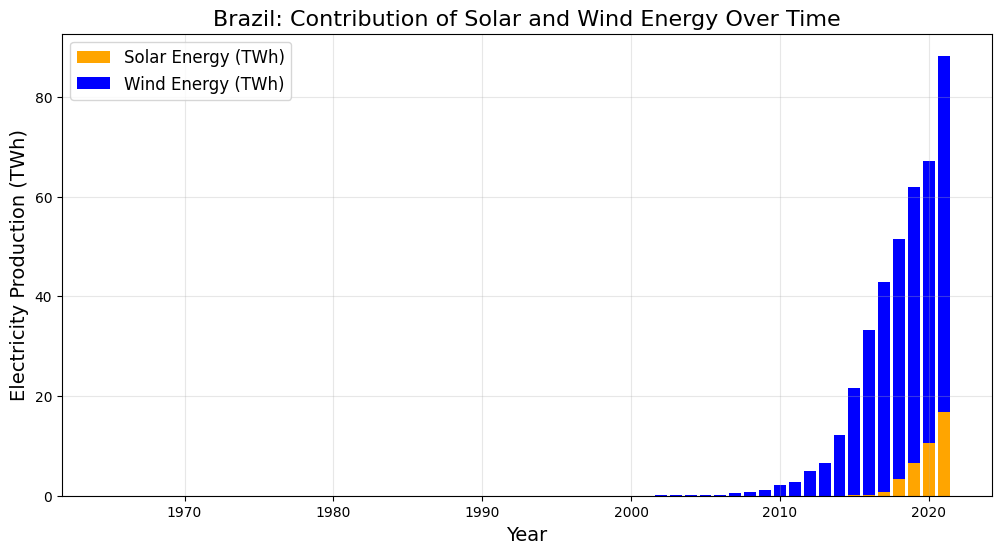

In [54]:
# Prepare data for stacked bar chart
years = brazil_solar["Year"]
solar_values = brazil_solar["Electricity from solar (TWh)"].values
wind_values = brazil_wind["Electricity from wind (TWh)"].values

# Create stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, solar_values, label="Solar Energy (TWh)", color="orange")
plt.bar(years, wind_values, bottom=solar_values, label="Wind Energy (TWh)", color="blue")

plt.title("Brazil: Contribution of Solar and Wind Energy Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (TWh)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Wind energy is contributing with almost 4 times more power than solar to Brazil

Growth Trend Comparison: Brazil vs. Leading Solar and Wind Countries
This plot compares Brazil’s growth to that of global leaders in solar and wind energy production.

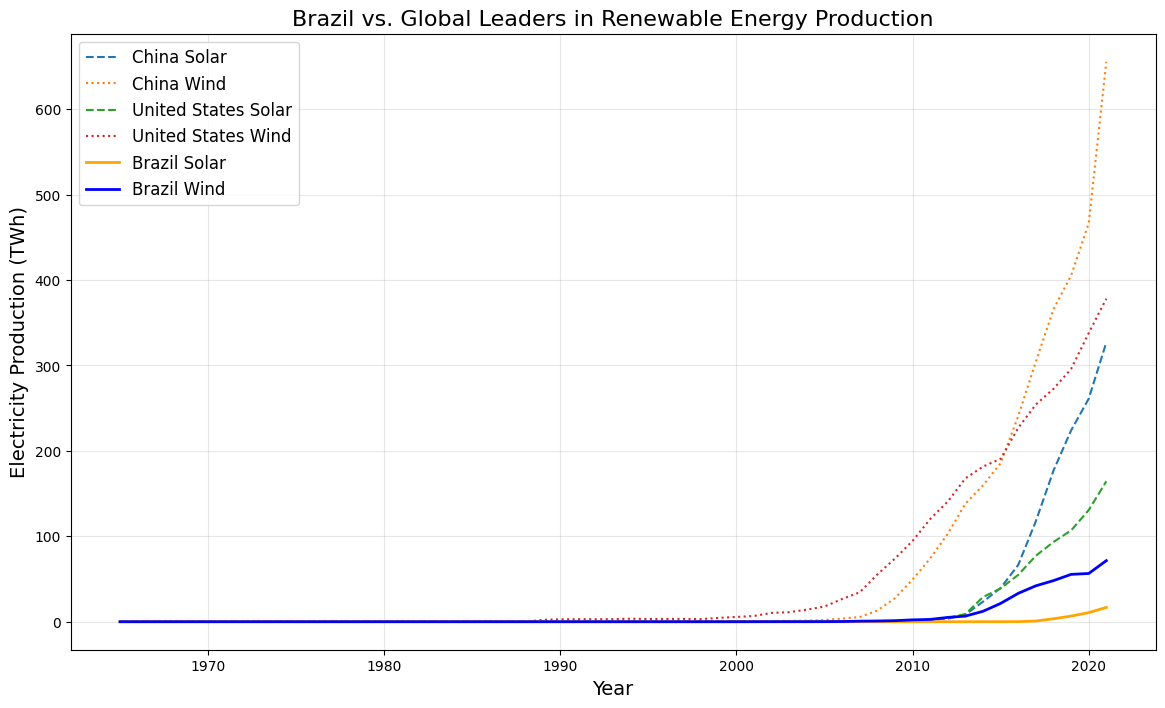

In [55]:
import matplotlib.pyplot as plt

# Top countries for solar and wind energy (excluding Brazil to avoid duplicate plotting)
top_countries = ["China", "United States"]

# Filter and plot for each country (excluding Brazil)
plt.figure(figsize=(14, 8))
for country in top_countries:
    solar_country = solar_data["12 solar-energy-consumption.csv"]
    wind_country = wind_data["08 wind-generation.csv"]
    
    solar_country = solar_country[solar_country["Entity"] == country]
    wind_country = wind_country[wind_country["Entity"] == country]
    
    # Plot solar and wind data for the country
    plt.plot(solar_country["Year"], solar_country["Electricity from solar (TWh)"], label=f"{country} Solar", linestyle="--")
    plt.plot(wind_country["Year"], wind_country["Electricity from wind (TWh)"], label=f"{country} Wind", linestyle=":")

# Plot Brazil's trends once (outside the loop) with distinct color and linewidth
brazil_solar = solar_data["12 solar-energy-consumption.csv"][solar_data["12 solar-energy-consumption.csv"]["Entity"] == "Brazil"]
brazil_wind = wind_data["08 wind-generation.csv"][wind_data["08 wind-generation.csv"]["Entity"] == "Brazil"]

# Plot Brazil's data (only once)
plt.plot(brazil_solar["Year"], brazil_solar["Electricity from solar (TWh)"], label="Brazil Solar", color="orange", linewidth=2)
plt.plot(brazil_wind["Year"], brazil_wind["Electricity from wind (TWh)"], label="Brazil Wind", color="blue", linewidth=2)

# Add title, labels, and legend
plt.title("Brazil vs. Global Leaders in Renewable Energy Production", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (TWh)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()

The difference between the world superpowers and Brazil is quite significant but understandable, given their population and GDP sizes.

In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the solar and wind data directly into DataFrames
solar_data = pd.read_csv(os.path.join(extraction_path, "12 solar-energy-consumption.csv"))
wind_data = pd.read_csv(os.path.join(extraction_path, "08 wind-generation.csv"))

# Load the world map shapefile
shapefile_path = r"C:/Users/mique/Downloads/110m_cultural/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Merge solar and wind data with the world shapefile based on country names
solar_map = world.merge(solar_data, how="left", left_on="NAME", right_on="Entity")
wind_map = world.merge(wind_data, how="left", left_on="NAME", right_on="Entity")

<Figure size 1000x700 with 0 Axes>

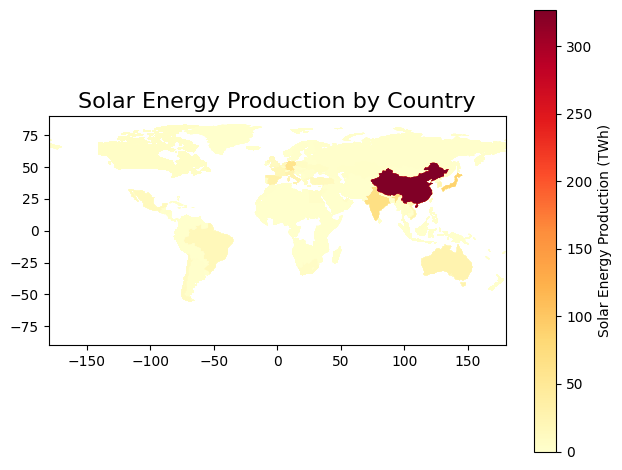

In [57]:
# Plot the solar energy map
plt.figure(figsize=(10, 7))
solar_map.plot(column="Electricity from solar (TWh)", cmap="YlOrRd", legend=True, 
               legend_kwds={'label': "Solar Energy Production (TWh)"})
plt.title("Solar Energy Production by Country", fontsize=16)
plt.xlim([-180, 180])
plt.ylim([-90, 90])   
plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

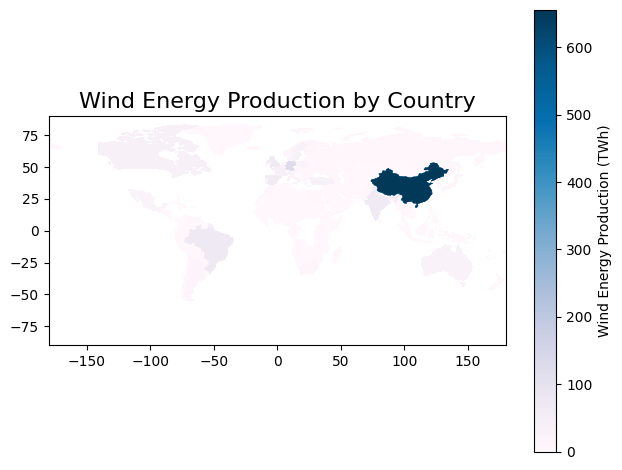

In [58]:
# Plot of wind energy map
plt.figure(figsize=(10, 7))
wind_map.plot(column="Electricity from wind (TWh)", cmap="PuBu", legend=True, 
              legend_kwds={'label': "Wind Energy Production (TWh)"})
plt.title("Wind Energy Production by Country", fontsize=16)
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])    
plt.tight_layout()
plt.show()

As we can see, China is by far leading the production of solar and wind energy.